In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [110]:
df = pd.read_csv('../data/DF_modelos/df_industrial_total.csv')

In [111]:
df.tail()

,Sector_Economic,consumo,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB,Empleo
2003,Indústria,1403736,2024.0,2024-06-26,0,0,0,0,22.623810,0.0,2.16875,5884873,16405,625100
2004,Indústria,1365435,2024.0,2024-06-27,0,0,0,0,23.776190,0.0,1.91250,5884873,16405,625100
2005,Indústria,1358576,2024.0,2024-06-28,0,0,0,0,24.452381,15.5,2.63750,5884873,16405,625100
2006,Indústria,994740,2024.0,2024-06-29,1,0,0,0,20.942857,223.6,2.05000,5884873,16405,625100
2007,Indústria,837210,2024.0,2024-06-30,1,0,0,0,21.857143,70.3,2.39375,5884873,16405,625100


## Paso 1: Preparación de los datos.

In [112]:
df.dtypes

Sector_Economic     object
consumo              int64
año                float64
fecha               object
findesemana          int64
festivos             int64
lectivos             int64
COVID                int64
tmed               float64
prec               float64
velmedia           float64
poblacion            int64
PIB                  int64
Empleo               int64
dtype: object

In [113]:
df.nunique()

Sector_Economic       1
consumo            1966
año                   6
fecha              2008
findesemana           2
festivos              2
lectivos              2
COVID                 3
tmed               1904
prec                540
velmedia           1092
poblacion            11
PIB                  38
Empleo               21
dtype: int64

In [114]:
df.shape

(2008, 14)

In [115]:
# Convertir la columna de fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [116]:
df['Sector_Economic'] = df['Sector_Economic'].astype('category')

### *Transformación variable `Fecha`*

1. Convertir fechas a formato numérico (timestamp)

In [117]:

# Asegúrate de que la columna de fecha está en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y')  # Ajusta el formato según tus datos

# Convertir la columna de fecha a timestamp
df['fecha'] = df['fecha'].astype(np.int64) // 10**9  # Convertir a dias


In [118]:
df['fecha'].tail

<bound method NDFrame.tail of 0       1546300800
1       1546387200
2       1546473600
3       1546560000
4       1546646400
           ...    
2003    1719360000
2004    1719446400
2005    1719532800
2006    1719619200
2007    1719705600
Name: fecha, Length: 2008, dtype: int64>

In [119]:
fecha_str='2024-07-01'
fecha = pd.to_datetime(fecha_str)

fecha_seg = fecha.value // 10**9 
print(fecha_seg)

1719792000


In [120]:
#Normalizar las columnas numéricas
scaler = StandardScaler()
df[['consumo', 'tmed', 'prec', 'velmedia', 'poblacion', 'PIB']] = scaler.fit_transform(df[['consumo', 'tmed', 'prec', 'velmedia', 'poblacion', 'PIB']])


In [121]:
skew = df.skew(axis=0, numeric_only=True)
skew

consumo        0.759936
año            0.089586
fecha          0.000000
findesemana    0.948621
festivos       4.776828
lectivos      -0.021930
COVID          1.139768
tmed           0.187073
prec           7.407125
velmedia       1.482939
poblacion      0.746403
PIB            0.216043
Empleo         0.454800
dtype: float64

In [122]:
my_list = []
for key,value in enumerate(skew):
    if value > 1:
        my_dict = {key:value}
        my_list.append(my_dict)
        
print(my_list)


[{4: 4.776828378782333}, {6: 1.1397676543831787}, {8: 7.40712474634465}, {9: 1.4829386760641927}]


## Paso 2:  Definición de la arquitectura de la red neuronal

1. Dividir los datos en características y objetivo

In [123]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['consumo', 'Sector_Economic', 'año'])  
y = df['consumo']  

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
X_train

,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB,Empleo
1249,1654214400,0,0,1,0,1.240148,-0.299241,-0.005490,-0.470845,0.675653,643700
261,1568851200,0,0,1,0,1.005489,0.031685,-0.674296,-0.927577,-0.350552,600300
607,1598745600,1,0,0,2,0.365280,0.502439,0.548484,-0.433294,-0.471801,573300
973,1630368000,0,0,0,2,1.030832,0.386848,0.426326,-0.451277,-0.404125,599200
240,1567036800,0,0,0,0,1.432963,-0.276869,-0.360886,-0.927577,-0.350552,600300
...,...,...,...,...,...,...,...,...,...,...,...
1130,1643932800,0,0,1,0,-0.921000,-0.299241,-1.167415,-0.470845,1.585889,581700
1294,1658102400,0,0,0,0,1.763438,-0.299241,0.139396,0.181627,-0.262593,627300
860,1620604800,0,0,1,2,0.145996,-0.060601,-0.102379,-0.435437,0.481449,578500
1459,1672358400,0,0,0,0,-0.562824,-0.297377,-0.746963,0.181627,-1.218612,607800


2. Construir el modelo de red neuronal

In [125]:
# Inicializar el modelo
modelInd = Sequential()

# Añadir la capa de entrada
modelInd.add(Input(shape=(X_train.shape[1],)))  # Define la forma de entrada aquí

# Añadir la primera capa oculta
modelInd.add(Dense(units=64, activation='relu'))

# Añadir una segunda capa oculta (opcional)
modelInd.add(Dense(units=32, activation='relu'))

# Capa de salida
modelInd.add(Dense(units=1))  # Para una regresión, una sola neurona sin función de activación

# Compilar el modelo
modelInd.compile(optimizer='adam', loss='mean_squared_error')


3. Entrenar el modelo

In [126]:
# Entrenar el modelo
history = modelInd.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8130882581823488.0000 - val_loss: 38332637642752.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31039005130752.0000 - val_loss: 3033146589184.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 855680352256.0000 - val_loss: 18672267264.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8567522816.0000 - val_loss: 467696640.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 249185760.0000 - val_loss: 1429787.5000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3285112.0000 - val_loss: 1257379.6250
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1360406.5000 - val_loss: 1268053.2500
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1357809.5000 - val_loss: 1254124.8750
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1370944.5000 - val_loss: 1400069.1250
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1520998.1250 - val_los

4. Evaluar el modelo

In [127]:
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 1539011.3750
Test Loss: 1764041.375


## Paso 3: Evaluación del modelo y predicciones

1. Visualizar la pérdida durante el entrenamiento

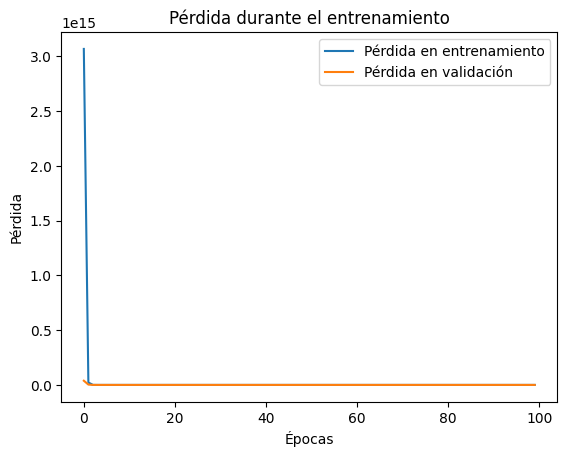

In [128]:
# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Evaluar el modelo en el conjunto de prueba

In [129]:
# Evaluar el modelo en el conjunto de prueba
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1539011.3750
Pérdida en el conjunto de prueba: 1764041.375


3. Hacer predicciones

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


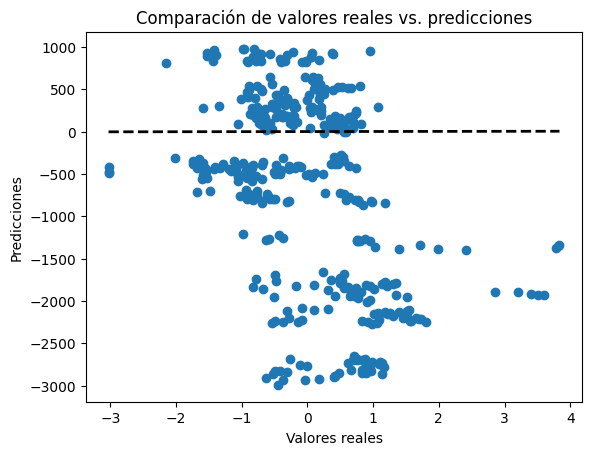

In [130]:
# Hacer predicciones
predicciones = modelInd.predict(X_test)

# Comparar predicciones con los valores reales
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales vs. predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.show()

4. Calcular métricas adicionales

In [131]:
mae = mean_absolute_error(y_test, predicciones)
rmse = mean_squared_error(y_test, predicciones, squared=False)

print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


Error Absoluto Medio (MAE): 1014.5950672014483
Raíz del Error Cuadrático Medio (RMSE): 1328.1721473021623


C:\Users\minip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [134]:
#Extraccion del modelo a una crapeta
# Guardar el modelo entrenado en una carpeta
modelInd.save('../models/modelo_industrial.h5')


In [133]:
modelInd.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

## Paso 4: Optimización del modelo

Aquí hay algunas estrategias que puedes utilizar para optimizar tu modelo:

#### 1. **Ajuste de Hiperparámetros**

- **Número de Neuronas y Capas**: Experimenta con el número de neuronas en cada capa y la cantidad de capas ocultas. Un modelo más complejo puede capturar mejor patrones en los datos, pero ten cuidado con el sobreajuste.

- **Tasa de Aprendizaje (Learning Rate)**: Ajusta la tasa de aprendizaje del optimizador. Puedes utilizar un optimizador como Adam que permite cambiar dinámicamente la tasa de aprendizaje.


### 2. **Regularización**

- **Dropout**: Introduce capas de `Dropout` para evitar el sobreajuste. Esto apaga aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que ayuda a que el modelo generalice mejor
- **Regularización L1 o L2**: Aplica técnicas de regularización a las capas densas.


#### 3. **Aumentar el número de épocas**

Aumentar el número de épocas puede ayudar a que el modelo aprenda mejor, pero asegúrate de monitorear la pérdida en el conjunto de validación para evitar el sobreajuste.


#### 4. **Early Stopping**

Implementa `EarlyStopping` para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de un número específico de épocas. Esto ayuda a evitar el sobreajuste.


#### 5. **Prueba con diferentes optimizadores**

Prueba diferentes optimizadores (como SGD, Adam, RMSprop) para ver si alguno mejora el rendimiento.


### 6. **Evaluar mejoras**

Después de aplicar algunas de estas técnicas, vuelve a evaluar el modelo utilizando el conjunto de prueba y compara el nuevo `Test Loss` y el `RMSE` con los resultados anteriores.
